# 1. Scope

The objective of this document will be to develop a Machine Learning model that allows the valuation of a property using variables that reduce the interference of the appraiser's subjectivity.

To achieve this, first of all, the Introduction section will list the different factors that influence in the pricing. Subsequently, in the Exploratory Analysis section, the characteristics of the provided dataset will be investigated, to finally determine the best descriptive model.

# 2. Factors that influence housing price

To address the problem comprehensively, I will first detail the various factors that can influence the price of a property. These are:

**Macro variables:**

- Supply of homes in the city (Number of months required to sell all homes for sale given the current rate)
- Employment situation (growth, stability)
- Interest rates
- Value of m2 relative to average salary
- Dollar value
- Inflation
- Government regulations

**Micro variables:**
- Location of conglomerates of companies
- Closeness to shopping malls, universities, subway stations, supermarkets
- Neighborhood location

**Construction characteristics:**
- Presence of amenities
- Age of the building
- Available services (for example gas, or fiber optic installation)
- Square meter
- Number of rooms
- Kind of property (for example garage, house, apartment, etc)
- Floor number
- Front or back of the building
- Presence or not of balcony in case of being an apartment

Since the data provided only describes the characteristics of the properties, only the factors of the last category will be taken into account for the present analysis, although adding questions related to the macro and micro environment could increase the precision of the model.

## 2. EDA and data cleaning

## Scope

The objective of this section will be to determine the characteristics of the dataset provided, to clean up the outliers and to determine the different variables to be used in the regression model.

## Analysis

First, we import the libraries we're going to use

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Next, we load the provided dataset. We can see that there are 146,660 registered properties, with 19 attributes for each one

In [2]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(properati.shape)
properati.head(5)

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


It can also be seen that there are 67,982 missing values, which are detailed below:

In [3]:
missing = pd.isnull(properati).values.sum()
print('There are '+str(missing)+' missing values in the dataset provided'+'\n')
print(properati.isnull().sum())

There are 67982 missing values in the dataset provided

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


There is a large amount (about 15%) of properties that have missing values in `surface_total` and `surface_covered`. We also see some missing values in `bathrooms`, `lat` and `lon` since they're not mandatory to create a publication.

Existen 10 tipos de propiedades en el dataset:

In [4]:
print('There are {} types of properties in the dataset: '.format(len(properati.property_type.unique()))+str(properati.property_type.unique()))

There are 10 types of properties in the dataset: ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


98% of the properties are apartment, house or PH. We can see this in the following bar chart:

The properties of the apartment, house or PH type cover 98% of the total


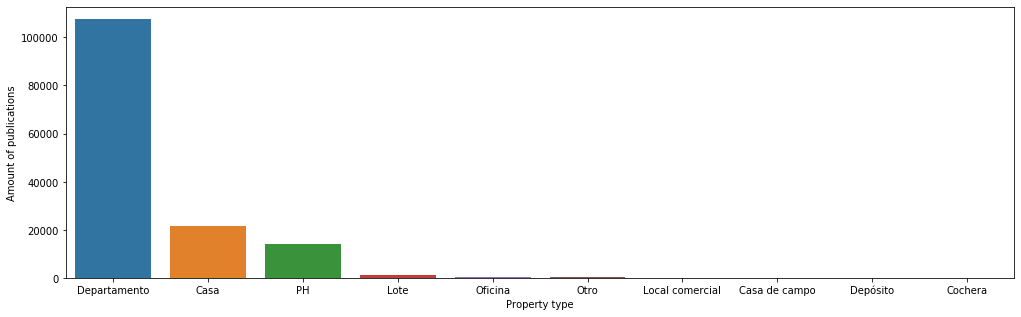

In [5]:
plt.figure(figsize=(17,5))
sns.countplot(x='property_type',data=properati,order=properati['property_type'].value_counts().sort_values(ascending=False).index)
plt.xlabel('Property type')
plt.ylabel('Amount of publications')
totalProperties = properati.property_type.count()
mainProperties = properati[properati.property_type.isin(['Departamento','PH','Casa'])].property_type.count()
print('The properties of the apartment, house or PH type cover '+"{:.0%}". format(mainProperties/totalProperties)+' of the total')

Regarding locations, publications do not have a uniform geographical distribution.

The vast majority (63.10%) of the properties were published in **Capital Federal**, while the most prevalent neighborhoods are **Palermo, Tigre, Almagro, Belgrano, Caballito, Villa Crespo, Recoleta, La Plata, La Matanza and Pilar**, which account for 45.78% of all publications

63.10% of properties published are located in Capital Federal


Top 10 neighborhoods (per amount of publications) are 
Palermo         13073
Tigre            8718
Almagro          7527
Belgrano         6935
Caballito        6650
Villa Crespo     6494
Recoleta         5917
La Plata         4354
La Matanza       3757
Pilar            3709
Name: l3, dtype: int64

They acount for 45.78%  of properties published


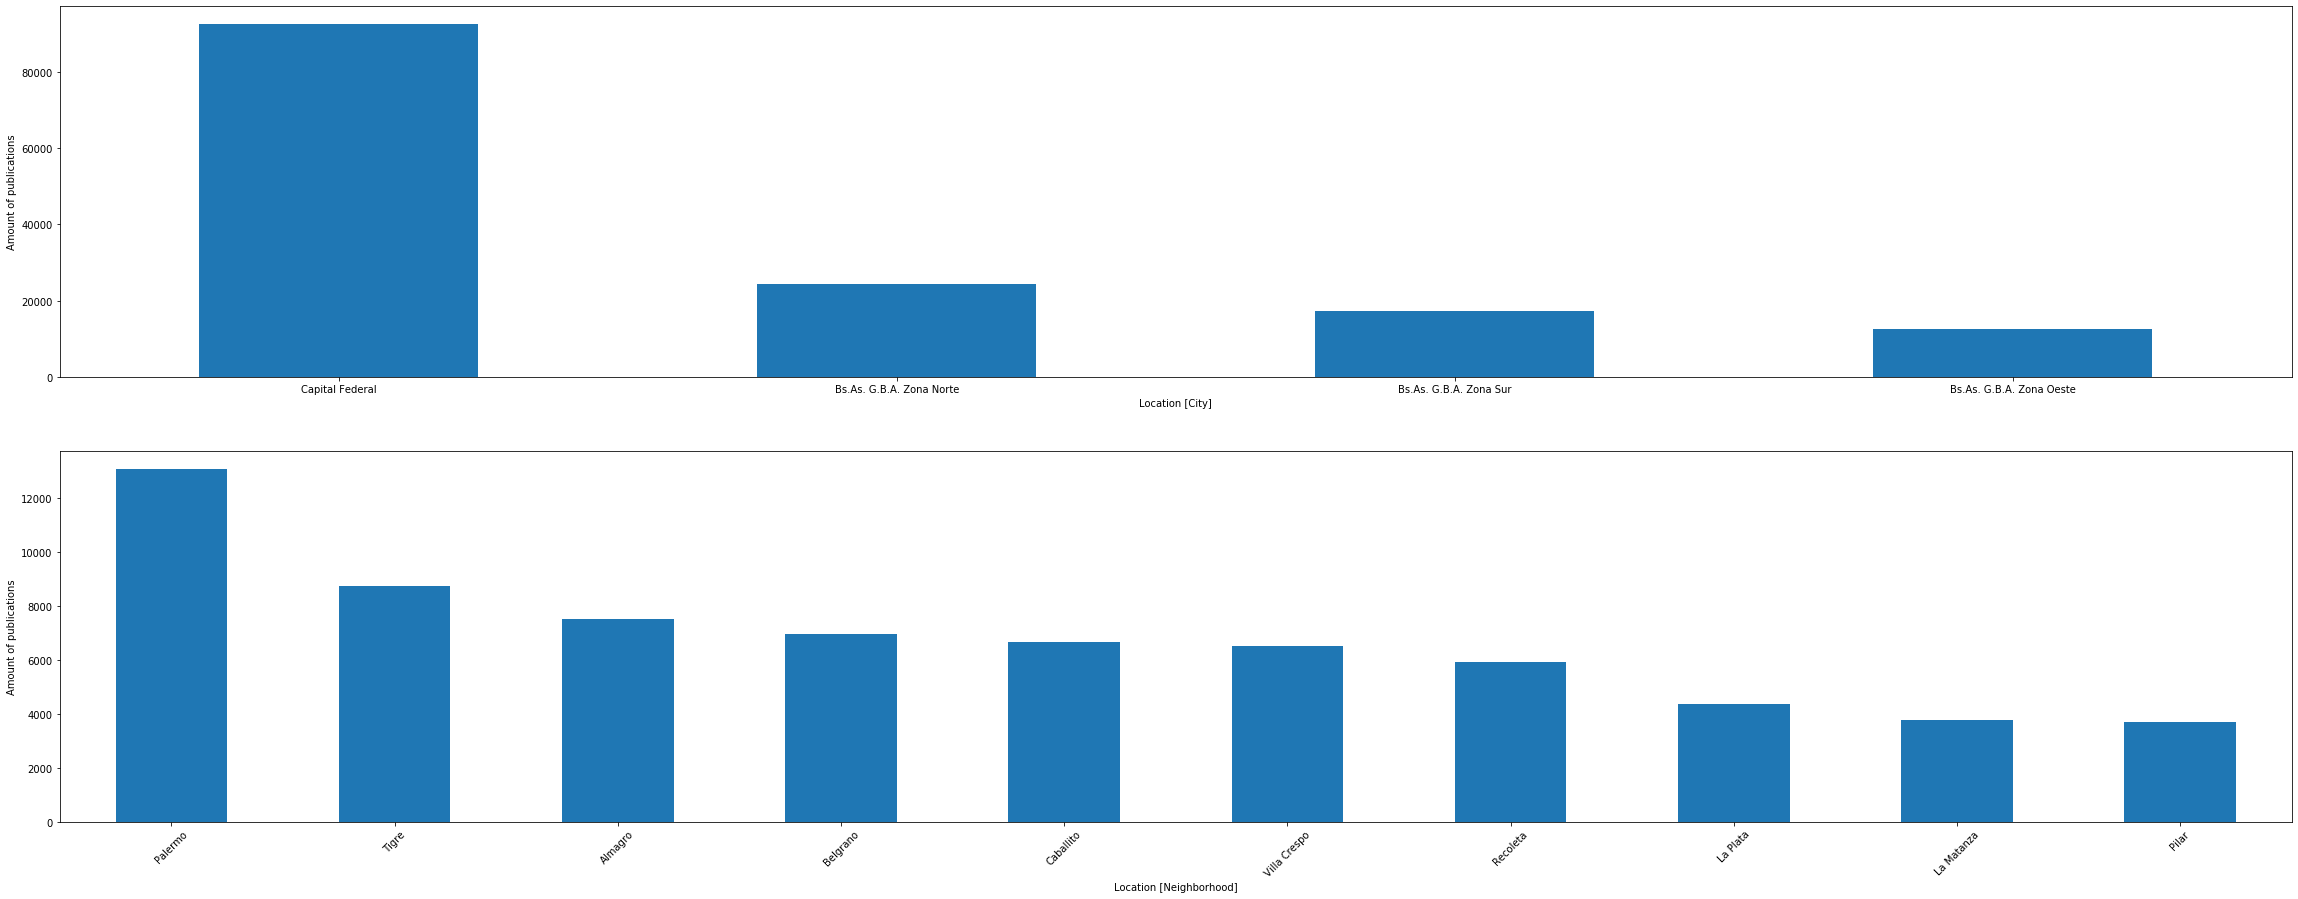

In [6]:
topNeighborhoods = properati[properati.l3.isin(properati.l3.value_counts().head(10).index)]
plt.figure(figsize=(40,15))

plt.subplot(2,1,1)
properati["l2"].value_counts().plot.bar()
matplotlib.pyplot.xticks(rotation=0)
plt.xlabel('Location [City]')
plt.ylabel('Amount of publications')

plt.subplot(2,1,2)
topNeighborhoods['l3'].value_counts().plot.bar()
matplotlib.pyplot.xticks(rotation=45)
plt.xlabel('Location [Neighborhood]')
plt.ylabel('Amount of publications')

top10Neighborhoods = properati["l3"].value_counts().head(10)
numProperties = properati.shape[0]
print("{:.2%}".format(properati["l2"].value_counts().head(1).sum()/numProperties)+" of properties published are located in Capital Federal\n\n")
print("Top 10 neighborhoods (per amount of publications) are \n"+str(top10Neighborhoods)+"\n")
print("They acount for "+ "{:.2%} ".format(top10Neighborhoods.sum()/numProperties)+" of properties published")

In order to simplify the analysis, we will work with the properties that are in **Capital Federal**, that are of the type **PH**, **Apartment** or **House**. These are, in total, 91,485

In [7]:
properatiFiltered = properati[properati.property_type.isin(['PH','Departamento','Casa'])&
                    properati.l2.isin(['Capital Federal'])]
properatiFiltered.shape

(91485, 19)

To simplify the dataset and work on its most relevant attributes, we will remove the following ones:
- **`lat`** (Latitude of the property)
- **`lon`** (Longitude of the property)
- **`start_date`** (Date of registration of the property publication)
- **`end_date`** (Date in which the publication has been withdrawn)
- **`created_on`** (Date in which the publication has been created)
- **`l1`** (First administrative level: country)
- **`l2`** (Second administrative level: province)
- **`l3`** (Third administrative level: city)
- **`currency`** (Currency in which the price is published)
- **`title`** (Publication title)
- **`description`** (Description of the property)
- **`operation_type`** (Type of operation (buy, rent))

In [8]:
properatidf = properatiFiltered.drop(columns=['lat','lon','start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type'])
properatidf

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


Next, I graph with histograms the different attributes to know their distribution:

C:\Users\gpozz\.conda\envs\Datascience\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gpozz\.conda\envs\Datascience\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


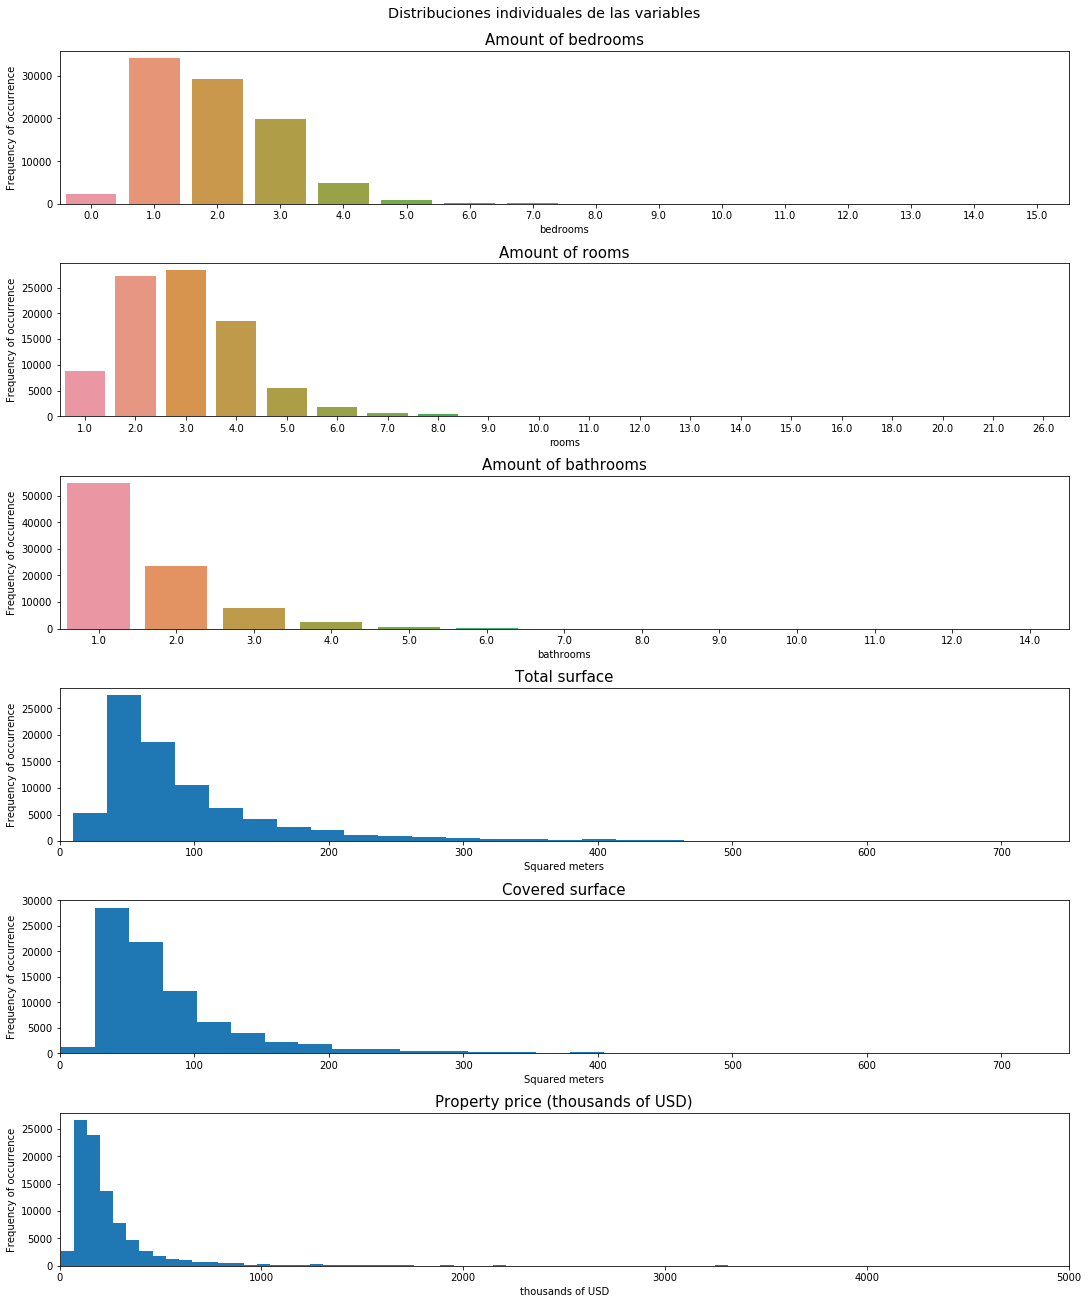

In [9]:
fig, axes = plt.subplots(6, 1, figsize=(15,18), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.countplot(properatidf["bedrooms"],
              ax=ax1)
ax1.set_ylabel('Frequency of occurrence')
ax1.set_title("Amount of bedrooms", fontdict={"fontsize":15})

sns.countplot(properatidf["rooms"],
              ax=ax2)
ax2.set_ylabel('Frequency of occurrence')
ax2.set_title("Amount of rooms", fontdict={"fontsize":15})

sns.countplot(properatidf["bathrooms"],
              ax=ax3)
ax3.set_ylabel('Frequency of occurrence')
ax3.set_title("Amount of bathrooms", fontdict={"fontsize":15})

ax4.hist(properatidf["surface_total"],
              bins=5000)
ax4.set_xlim(0,750)
ax4.set_ylabel('Frequency of occurrence')
ax4.set_xlabel('Squared meters')
ax4.set_title("Total surface", fontdict={"fontsize":15})

ax5.hist(properatidf["surface_covered"],
              bins=5000)
ax5.set_xlim(0,750)
ax5.set_xlabel('Squared meters')
ax5.set_ylabel('Frequency of occurrence')
ax5.set_title("Covered surface", fontdict={"fontsize":15})

ax6.hist(properatidf["price"]/1000, bins=500)
ax6.set_xlim(0,5000)
ax6.set_ylabel('Frequency of occurrence')
ax6.set_xlabel('thousands of USD')
ax6.set_title("Property price (thousands of USD)", fontdict={"fontsize":15})
fig.suptitle("Distribuciones individuales de las variables", size= "x-large")
plt.show()

I rename the different columns to add clarity about the attributes they represent in the dataset:

In [12]:
properatidf.columns=['Rooms','Bedrooms','Bathrooms','Total surface','Covered surface','Price','Property type']
properatidf

,Rooms,Bedrooms,Bathrooms,Total surface,Covered surface,Price,Property type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


I then plot the different relationships between attributes in pairs in a **pairplot**. We can see that because all the dataset values are plotted, the *outliers* do not allow us to observe the shape of the different distributions with greater clarity, so it would be convenient to clean them, which is what we will do in the next steps

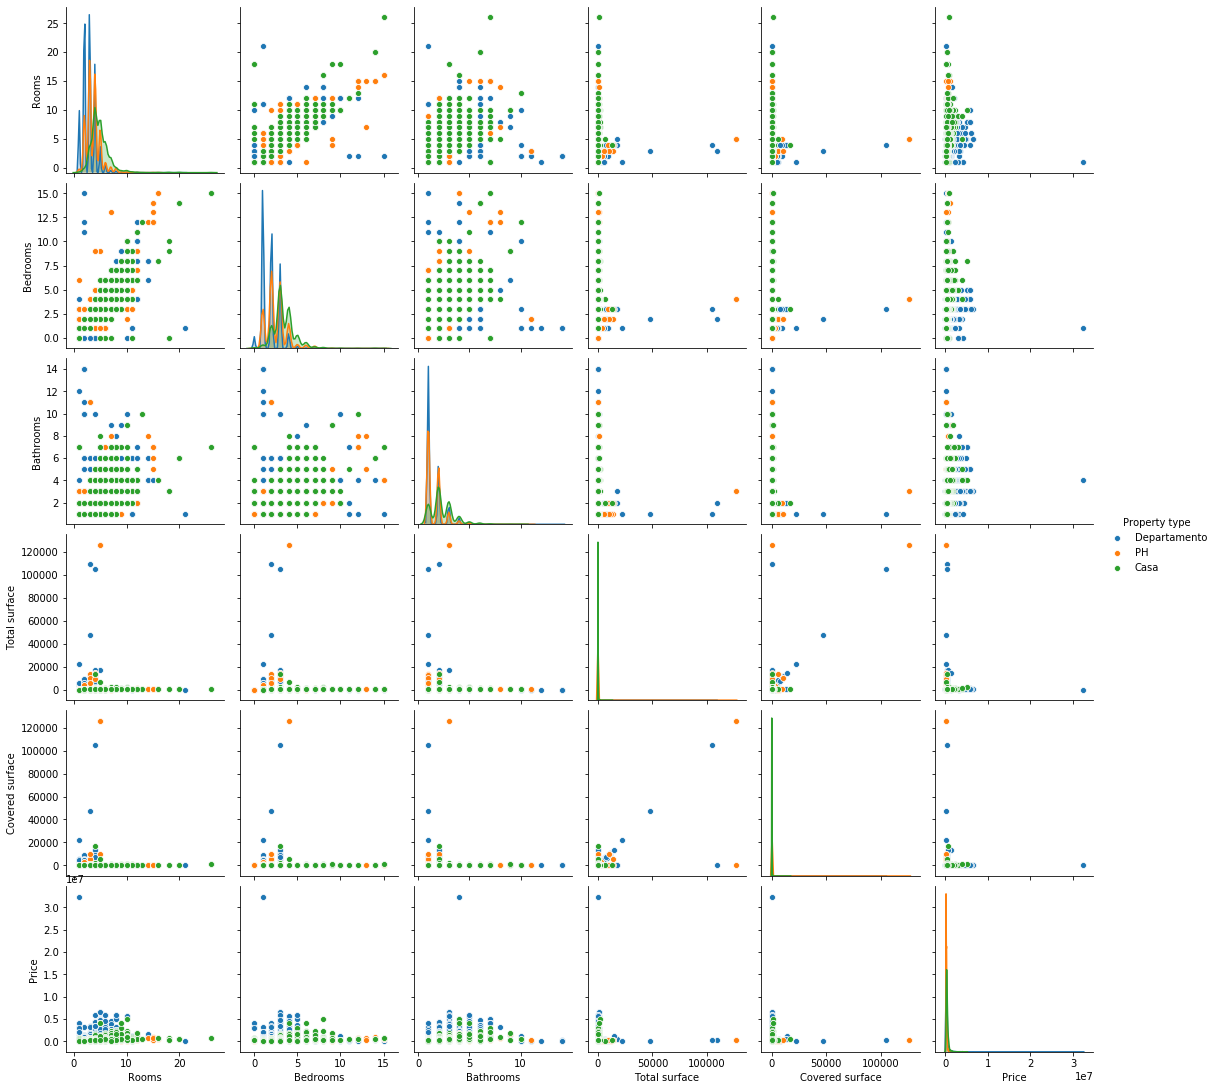

In [13]:
sns.pairplot(data=properatidf,hue='Property type')

The dataset statistical details for the different variables are the following:

In [14]:
properatidf.describe()

,Rooms,Bedrooms,Bathrooms,Total surface,Covered surface,Price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Regarding the outliers, I could get the following observations from it:
- There is at least one property with 14 bathrooms, which is excessive.
- There is a property with 10 m ^ 2, this may constitute a input error since an apartment with that surface is phisically impossible to live in, the same could be said about a property of 126.062 m^2, which is 12 times the surface of an average block of 100 m^2.
- There is at least one property with **26 rooms**.
- There is at least one property with **15 rooms**.

--------------

As can be seen in the following boxplot, some types of properties have large deviations from the surface in most cases. This could be due to input errors

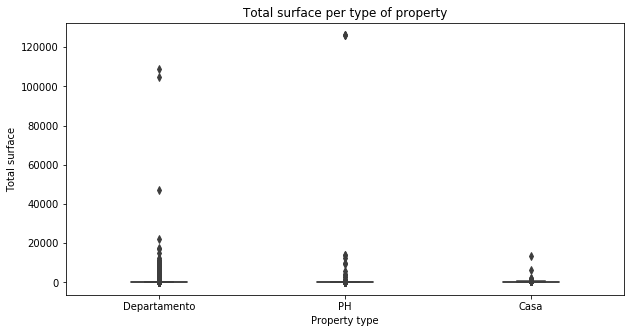

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data= properatidf,x='Property type',y='Total surface',width=0.3)
plt.title('Total surface per type of property')
plt.show()

Resulta conveniente, entonces, descartar las propiedades por encima de los 600 m2. A continuación se puede observar el resultado

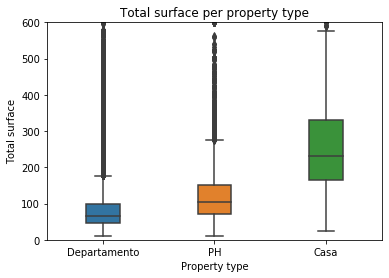

In [16]:
sns.boxplot(data=properatidf,x='Property type',y='Total surface',width=0.3)
plt.xlabel('Property type')
plt.ylabel('Total surface')
plt.title('Total surface per property type')
plt.ylim(0,600)
plt.show()

At the same time, zooming in on the graph for low values, it can be seen that there are no properties below 9 m^2. So, I also set the lower limit of the graph to this value

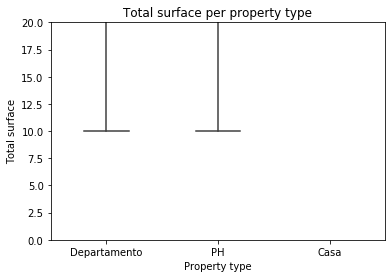

In [17]:
sns.boxplot(data= properatidf,x='Property type',y='Total surface')
plt.xlabel('Property type')
plt.ylabel('Total surface')
plt.title('Total surface per property type')
plt.ylim(0,20)
plt.show()

Prices also show a significant dispersion. A **boxplot** will be presented below to determine that the price range in USD of the different properties to be considered will be **[6,000 - 850,000]**

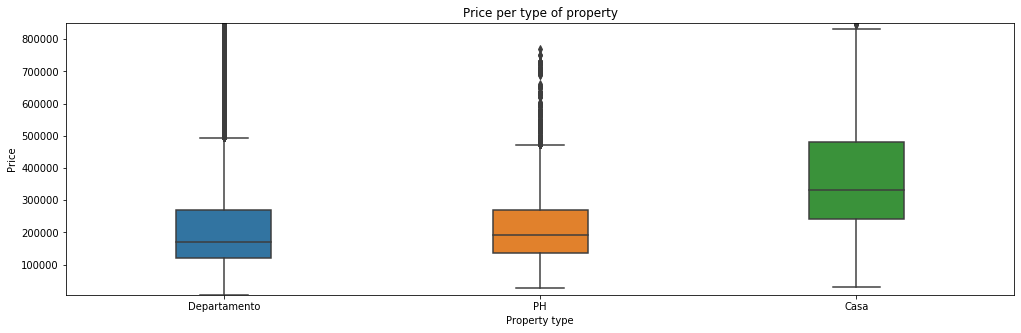

In [18]:
plt.figure(figsize=(17,5))
sns.boxplot(data=properatidf,x='Property type',y='Price',width=0.3)
plt.ylim(6000,850000)
plt.title('Price per type of property')
plt.xlabel('Property type')
plt.ylabel('Price')
plt.show()

I apply the above filtering to the dataframe I am working with

In [20]:
newFiltered = properatidf[(properatidf['Total surface'] >= 9) & (properatidf['Total surface'] <= 600) & (properatidf['Price'] >= 6000)& (properatidf['Price'] <= 850000)]

I also drop the instances in which the total surface is greater than the covered surface, since they correspond to input errors

In [21]:
newFiltered = newFiltered[(newFiltered['Total surface'] >newFiltered['Covered surface'])]

The pairwise relationships are plotted in the following **pairplot**. The filtering has changed the shape of the distributions with respect to the previous one and allows a better analysis.

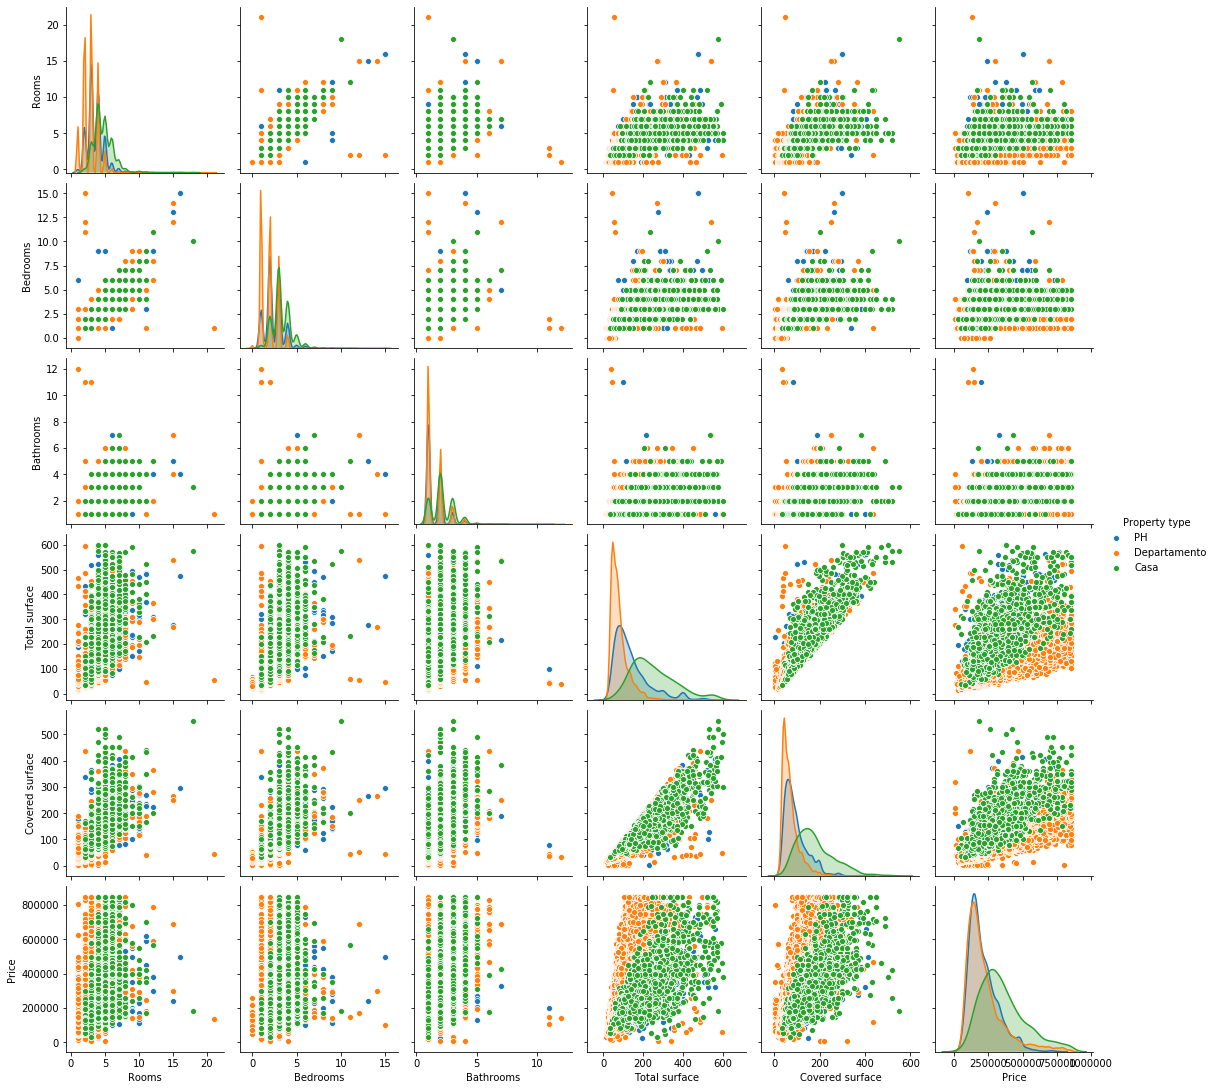

In [22]:
sns.pairplot(data=newFiltered,hue='Property type')

I then generate a heat map to see more easily the correlation between the different variables.

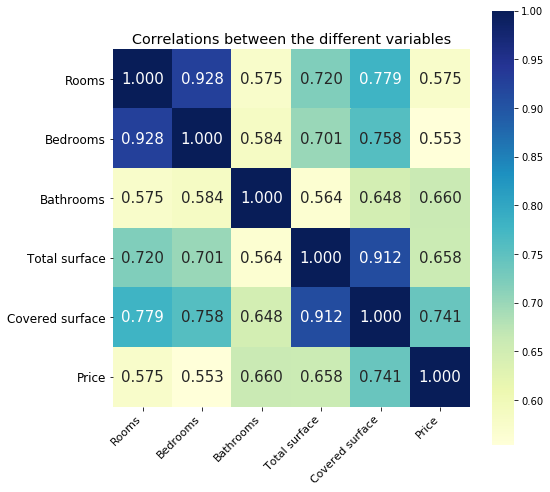

In [23]:
data = newFiltered
corr = data.corr(method="pearson")
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 15},
            cmap= 'YlGnBu')
ax.set_title("Correlations between the different variables", fontsize='x-large')
ax.set_xticklabels(data.columns,rotation = 45, fontsize = 12,horizontalalignment= 'right')
ax.set_yticklabels(data.columns,rotation = 0, fontsize = 12)
plt.xticks(rotation= 45, fontsize= 11, horizontalalignment= 'right')
plt.show()

## Feature selection

The following can be observed:
- The number of rooms and bedrooms is highly correlated.
- There is not a big difference between the amount of squared meters destined to *covered* and *total surfaces*. This is explained by the fact that the vast majority of publications correspond to apartments whose not-covered surface is practically identical to the covered surface (lacking a balcony for example).
- The 3 best predictor variables for price (since they correlate better with this attribute) are, in order: **Covered surface**, **Bathrooms** and **Total surface**

--------------

## Additional analysis: correlation between population density and apartment size

As an additional topic to dig on, I propose to observe how the average number of squared meters of the apartments in each neighborhood correlates with the population density of each one.

I start from the hypothesis that the higher the price of properties per squared meter, the lower the population density will be, since high prices limit the number of people who can live in it due to purchasing power. It is expected that the higher the price, the lower the number of people who can access to rent a home in said neighborhood.

For this, first of all I take the public dataset of the Government of the City of Buenos Aires

In [24]:
# Dataset load
datasetCity = pd.read_excel('https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2010/01/PB2_22n.xls',header=1)

# Drop non relevant rows
datasetCity.drop([0,1,65,66],axis = 0,inplace=True)
datasetCity = datasetCity[~datasetCity['Comuna y Barrio'].str.contains('Comuna',na=False)]

# Select the relevant column
densities = datasetCity.iloc[:,[0,-1]]
densities

,Comuna y Barrio,Densidad poblacional (hab/km2)
3,Constitución,20973.408593
4,Monserrat,18159.136759
5,Puerto Madero,1338.398260
6,Retiro,14450.244268
7,San Nicolás,12784.946328
8,San Telmo,16601.427106
10,Recoleta,25100.487842
12,Balvanera,31991.007052
13,San Cristobal,23785.651084
15,Barracas,11240.806796


I get the list of unique values of neighborhoods of the Properati dataset

In [25]:
list(properati['l3'].unique())

['San Cristobal',
 'Boedo',
 'Palermo',
 'La Plata',
 'Villa Crespo',
 'Parque Patricios',
 'Villa Pueyrredón',
 'Pilar',
 'Tigre',
 'Abasto',
 'Flores',
 'Morón',
 'Nuñez',
 'Almagro',
 'Belgrano',
 'Floresta',
 'Recoleta',
 'Balvanera',
 'Caballito',
 'Chacarita',
 'San Telmo',
 'Colegiales',
 'La Matanza',
 'San Isidro',
 'San Miguel',
 'Villa Luro',
 'Barrio Norte',
 'Las Cañitas',
 'San Nicolás',
 'Villa Urquiza',
 'Vicente López',
 'Parque Centenario',
 'General San Martín',
 'Villa General Mitre',
 'Lanús',
 'Ituzaingó',
 'Boca',
 'Once',
 'Retiro',
 'Monserrat',
 'Avellaneda',
 'San Fernando',
 'Puerto Madero',
 'Villa Ortuzar',
 'Parque Chacabuco',
 'Centro / Microcentro',
 'Tres de Febrero',
 'Liniers',
 'Coghlan',
 'Congreso',
 'Paternal',
 'Saavedra',
 'Villa Santa Rita',
 'Barracas',
 'Villa Lugano',
 'Constitución',
 'Mataderos',
 'Villa Devoto',
 'Parque Avellaneda',
 'Villa del Parque',
 'Esteban Echeverría',
 'Lomas de Zamora',
 'Almirante Brown',
 'Ezeiza',
 'San Vice

I check the neighborhoods not present in the list published by the city government

In [26]:
buenosAires = properati.loc[properati['l2'] == 'Capital Federal']
list(buenosAires['l3'].unique()[~np.in1d(buenosAires['l3'].unique(),densities['Comuna y Barrio'])])

['Abasto',
 'Barrio Norte',
 'Las Cañitas',
 'Parque Centenario',
 'Villa General Mitre',
 'Once',
 'Centro / Microcentro',
 'Congreso',
 'Villa Santa Rita',
 'Villa Lugano',
 'Villa del Parque',
 'Pompeya',
 'Tribunales',
 'Catalinas']

Neighborhoods present in the Properati dataset that are not found in the Buenos Aires Government's dataset are due to the fact that in many cases they are unofficial subdivisions (for example, Once and Abasto are officially contained in the Balvanera neighborhood, which is same as Catalinas inside La Boca).

In others, it is due to a difference in denomination. These are:
- Nueva Pompeya = Pompeya
- Santa Rita = Villa Santa Rita
- Villa del Parque = Villa del Parque
- Villa Gral Mitre = Villa General Mitre
- Lugano = Villa Lugano

I rename the neighborhoods with similar names

In [27]:
densities['Comuna y Barrio'][17] = 'Pompeya'
densities['Comuna y Barrio'][28] = 'Villa Santa Rita'
densities['Comuna y Barrio'][43] = 'Villa del Parque'
densities['Comuna y Barrio'][44] = 'Villa General Mitre'
densities['Comuna y Barrio'][46] = 'Villa Lugano'
densities

C:\Users\gpozz\.conda\envs\Datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gpozz\.conda\envs\Datascience\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gpozz\.conda\envs\Datascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Comuna y Barrio,Densidad poblacional (hab/km2)
3,Constitución,20973.408593
4,Monserrat,18159.136759
5,Puerto Madero,1338.398260
6,Retiro,14450.244268
7,San Nicolás,12784.946328
8,San Telmo,16601.427106
10,Recoleta,25100.487842
12,Balvanera,31991.007052
13,San Cristobal,23785.651084
15,Barracas,11240.806796


I calculate the average price and surface of all properties

In [31]:
# Calculate the averages of all the variables of the Buenos Aires dataframe
avgPrices = buenosAires.groupby("l3").mean()

# Divide prices by total surface
avgM2 = avgPrices['price']/avgPrices['surface_total']

# Transform avgM2 from series to dataframe to be able to merge it with the dataframe densities
avgM2 = avgM2.to_frame().reset_index()

# Rename columns
avgM2.columns = ['Comuna y Barrio','Precio promedio por m2']
avgM2

,Comuna y Barrio,Precio promedio por m2
0,Abasto,2253.277927
1,Agronomía,1862.569895
2,Almagro,2002.916725
3,Balvanera,1610.715356
4,Barracas,2028.458230
5,Barrio Norte,2161.002141
6,Belgrano,2948.613007
7,Boca,943.365470
8,Boedo,1641.892235
9,Caballito,1331.503492


Merge both datasets and sort them by population density

In [33]:
df_2 = pd.merge(densities,avgM2,on='Comuna y Barrio',how='left')
df_2 = df_2.sort_values(by=['Densidad poblacional (hab/km2)'])
df_2

,Comuna y Barrio,Densidad poblacional (hab/km2),Precio promedio por m2
2,Puerto Madero,1338.398260,6188.826732
19,Villa Riachuelo,3297.353267,3946.296920
20,Villa Soldati,5356.741201,712.543858
42,Agronomía,6555.332042,1862.569895
11,Pompeya,8588.160545,689.006675
22,Mataderos,8713.768363,1274.081622
45,Paternal,8843.156343,1498.295011
43,Chacarita,8902.578237,1997.542582
10,Boca,8981.300835,943.365470
35,Saavedra,9088.610441,2169.991499


Grafico los datos

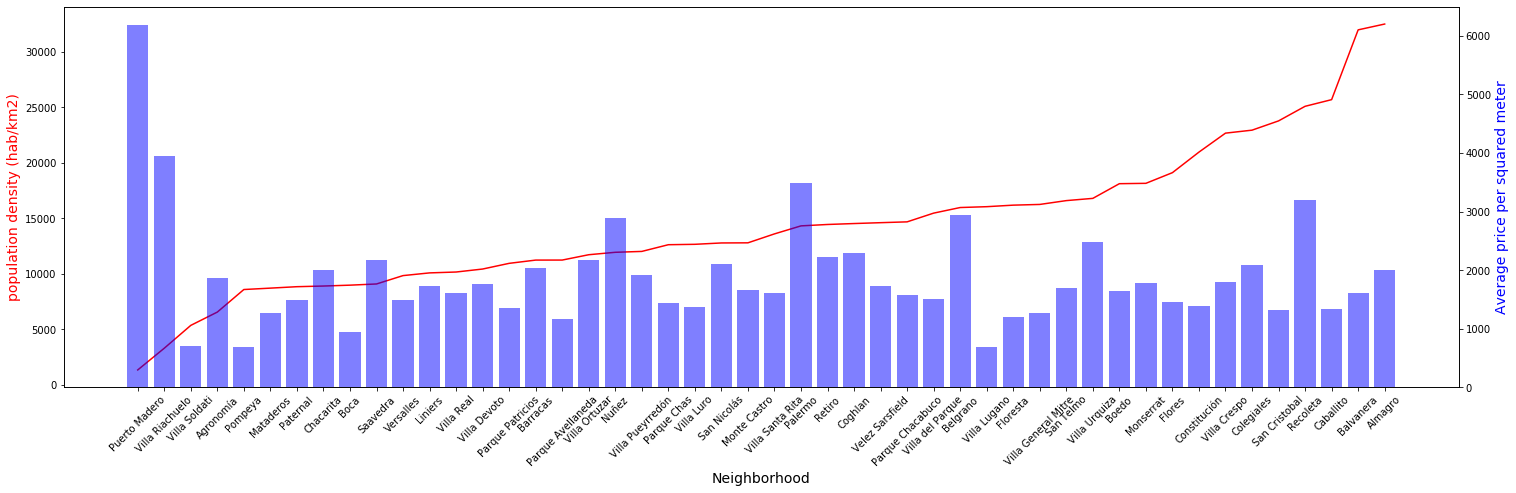

In [34]:
fig, ax = plt.subplots(figsize=(25,7))

# Plot population density with line
ax.plot(df_2['Comuna y Barrio'],df_2['Densidad poblacional (hab/km2)'], color="red")
ax.set_xlabel("Neighborhood",fontsize=14)
plt.xticks(rotation=45)
# Main Y axis label
ax.set_ylabel("population density (hab/km2)",color="red",fontsize=14)

ax2=ax.twinx()
# Plot price per squared meter with bars
ax2.bar(df_2['Comuna y Barrio'],df_2['Precio promedio por m2'],color="blue",alpha=0.5)
# Secondary Y axis label
ax2.set_ylabel("Average price per squared meter",color="blue",fontsize=14)

plt.show()

Finally, I analyze the correlation in numerical values

In [35]:
df_2.corr()

,Densidad poblacional (hab/km2),Precio promedio por m2
Densidad poblacional (hab/km2),1.000000,-0.193164
Precio promedio por m2,-0.193164,1.000000


**Conclusion**: it can be observed that although it is true that the trend is inverse (the higher the price per m2, the lower the population density), the correlation is not very strong.

# 3. Machine Learning

## Scope

In this section, 2 machine learning models will be trained to predict the prices of the properties present in the dataset, they will be compared with a benchmark model, their hyperparameters will be optimized to reduce the error and finally an analysis will be carried out on the methodology proposal

## Selection of measurement of error

Import the libraries needed for this section:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

Taking into account the results of section 1 ("Exploratory data analysis"), for this section I will select the following data:
- Properties in `l3` **Capital Federal**, `property_type` **Apartment**, **PH** or **House**, whose `total_area` is **less than 1000 m2** and **greater than 15 m2**, whose `price` is **less than $ 4,000,000**.
- I only use the columns `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` and `price`.
- I discard instances with missing values.

In [37]:
# Filter properties of type PH, apartment or house located in Capital Federal
filtered = properati[properati.property_type.isin(['PH','Departamento','Casa'])& properati.l2.isin(['Capital Federal'])]

# Filter properties with surface_total greater than 15 and less than 1000
filtered = filtered[(filtered['surface_total'] >= 15) & (filtered['surface_total'] <= 1000)]

# Filter properties priced below $ 4,000,000
filtered = filtered[(filtered['price'] <= 4000000)]

# Separate attributes that are not rooms, bedrooms, bathrooms, surface_total, surface_covered and price
filtered = filtered.drop(columns=['lat','lon','start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type','property_type'])

# Drop instances with missing values
filtered = filtered.dropna(axis=0)
filtered.shape

(81019, 6)

To evaluate the model, the indicator ** RMSE ** will be used, which is defined below

![title](https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png)

It was chosen because, on the one hand, the **MSE** is too sensitive to outliers, and, on the other, the **MAE** penalizes them very little.

## Setting predictor and target variables

I select the predictor (**`X`**) and target variables (**`y`**)

In [38]:
X = filtered.drop(columns= ['price'])
y = filtered['price']

Test/train/split the dataset with **70/30 ratio**

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 5)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


## Setting benchmark model

I generate a benchmark model to compare the results of the different models. In this case, it will consist of a **`linear regression`**. I train it and make the prediction

In [40]:
# Select regression model
linear_model = LinearRegression()

# Train model
linear_model.fit(X_train, y_train)

# Predict for train and test sets
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Calculate RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

# Print the result
print("RMSE for benchmark model in train is:",rmse_train)
print("RMSE for benchmark model in test is:",rmse_test)

RMSE for benchmark model in train is: 201083.63734027682
RMSE for benchmark model in test is: 197812.84011839097


## Comparing benchmark with other models

I perform a regression using decision trees. It can be seen that the error is less than that of the benchmark model

In [41]:
# Select the model and its parameters
tree_regressor = DecisionTreeRegressor(random_state=30)

# Train it
tree_regressor.fit(X_train, y_train)

# Perform predictions for both train and test set
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Calculate RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the results
print("RMSE for decision tree in train is:",rmse_train)
print("RMSE for decision tree in test is:",rmse_test)

RMSE for decision tree in train is: 54659.18987126869
RMSE for decision tree in test is: 139057.86697472306


I do the same for the KNN model, which presents a greater error than the previous one

In [42]:
# Select the model
KNN_regressor = KNeighborsRegressor()

# Train it
KNN_regressor.fit(X_train, y_train)

# Perform predictions for both train and test set
y_train_pred = KNN_regressor.predict(X_train)
y_test_pred = KNN_regressor.predict(X_test)

# Calculate RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the results
print("RMSE for KNN in train is:",rmse_train)
print("RMSE for KNN in test is:",rmse_test)

RMSE for KNN in train is: 123865.16561014786
RMSE for KNN in test is: 152607.73446789617


Plot the predicted values vs actual values. The model that best predicts the test set is **Decision Tree**, since it presents an RMSE much lower than the other 2 alternatives

Model: Linear regression
Squared root of mean squared error in train: 201083.637
Squared root of mean squared error in test: 197812.84


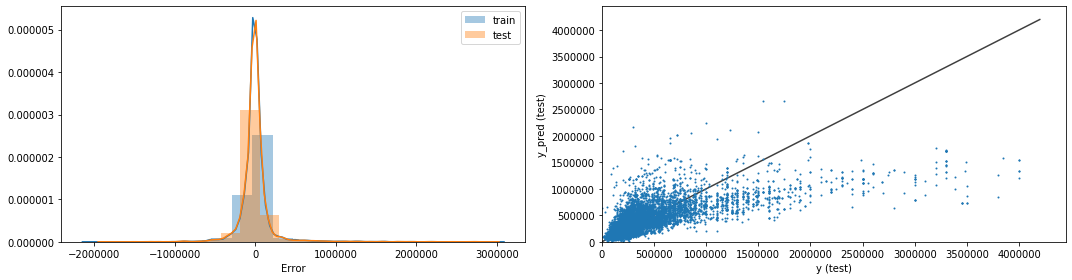

Model: Decision tree
Squared root of mean squared error in train: 54659.19
Squared root of mean squared error in test: 139057.867


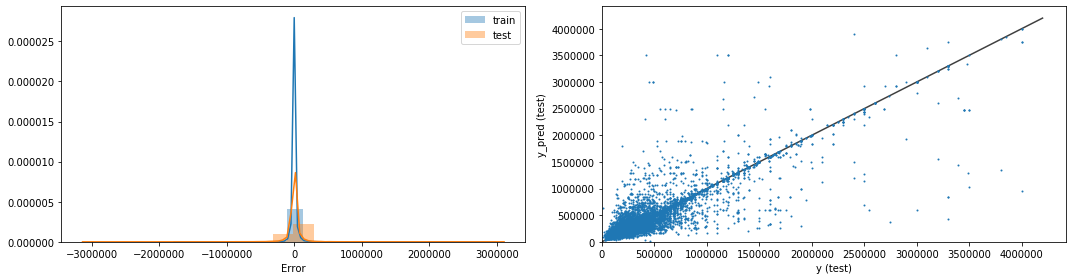

Model: K-nearest neighbors
Squared root of mean squared error in train: 123865.166
Squared root of mean squared error in test: 152607.734


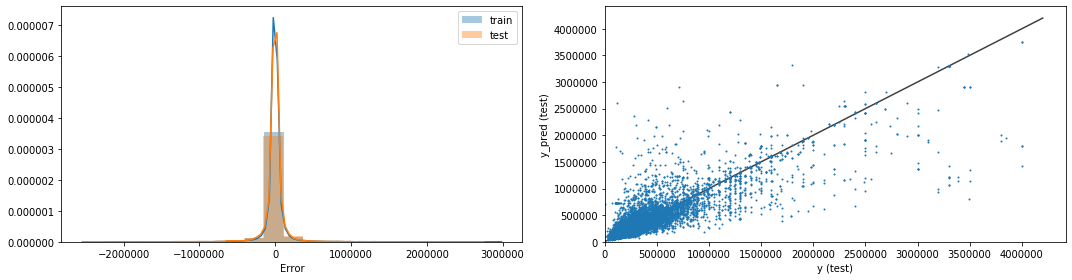

In [45]:
# State all different models in a list
models = ['Linear regression', 'Decision tree', 'K-nearest neighbors']

for i, model in enumerate([linear_model, tree_regressor, KNN_regressor]):

    # Perform predictions for both train and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Model: {models[i]}')

    # Calculate RMSE for both sets
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Squared root of mean squared error in train: {round(rmse_train,3)}')
    print(f'Squared root of mean squared error in test: {round(rmse_test,3)}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Error')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s = 1)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlim(0,)
    plt.ylim(0,)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Models optimization

Plot the RMSE for the different hyperparameters to obtain the optimal value for the decision tree model

Min RMSE in test of $138,384.87 , corresponding to depth n =  22


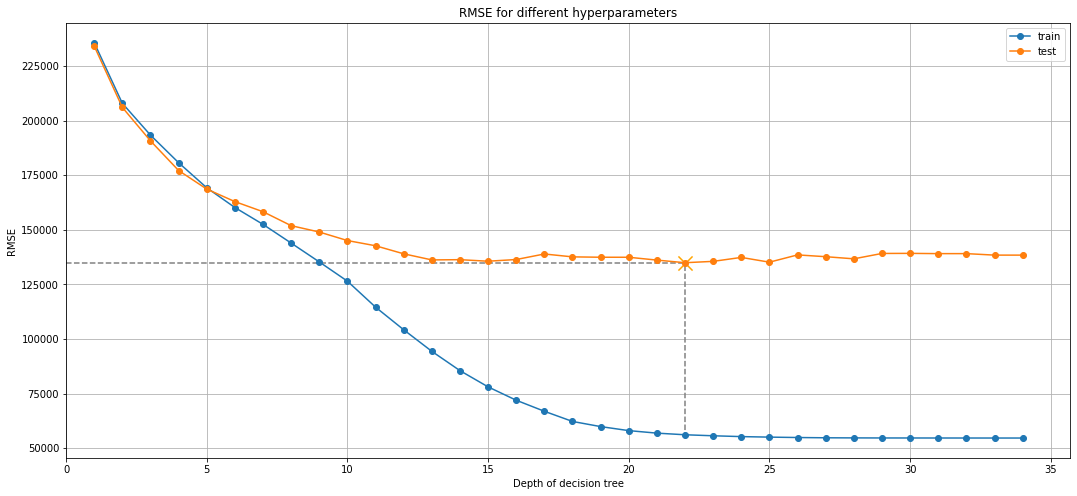

In [46]:
# Set empty lists for the desired accuracy values
rmse_accuracy_train = []
rmse_accuracy_test = []

# Set list of tree depth values
max_depths = np.arange(1,35)

# Loop over the different depth values
for max_depth in max_depths:
    
    # Set model with the depth value for this iteration
    rgrT = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Train model
    rgrT.fit(X_train,y_train)
    
    # Predict over train set
    y_train_pred = rgrT.predict(X_train)
    rmse_accTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predict over test set
    y_test_pred = rgrT.predict(X_test)
    rmse_accTest = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append accuracy to the list of accuracy values
    rmse_accuracy_train.append(rmse_accTrain)
    rmse_accuracy_test.append(rmse_accTest)
    
    rmse_dt_min = min(rmse_accuracy_test)
    dt_min = rmse_accuracy_test.index(min(rmse_accuracy_test))+1
   
    
plt.figure(figsize=(18,8))
plt.plot(max_depths,rmse_accuracy_train,'o-',label='train' )
plt.plot(max_depths,rmse_accuracy_test,'o-',label='test')


plt.hlines(rmse_dt_min, 
           xmin = 0, 
           xmax = dt_min, 
           linestyles = 'dashed',
           colors = 'grey')

plt.vlines(dt_min, 
           ymax = rmse_dt_min, 
           ymin = min(rmse_accuracy_train), 
           linestyles = 'dashed',
           colors = 'grey')

plt.scatter(dt_min,rmse_dt_min, s = 200, color = 'orange', marker = "x",)

plt.xlim(0,)
plt.ylabel('RMSE')
plt.xlabel('Depth of decision tree')
plt.legend()
plt.title('RMSE for different hyperparameters')
plt.grid()
print('Min RMSE in test of '+"${:,.2f}". format(rmse_accTest.min()),
      ', corresponding to depth n = ',
     f"{rmse_accuracy_test.index(min(rmse_accuracy_test))+1}")

Plot RMSE for the different hyperparameters to obtain the optimal value for the nearest neighbors model

Min RMSE in test of $151,076 , corresponding to amount of neighbors k =  4


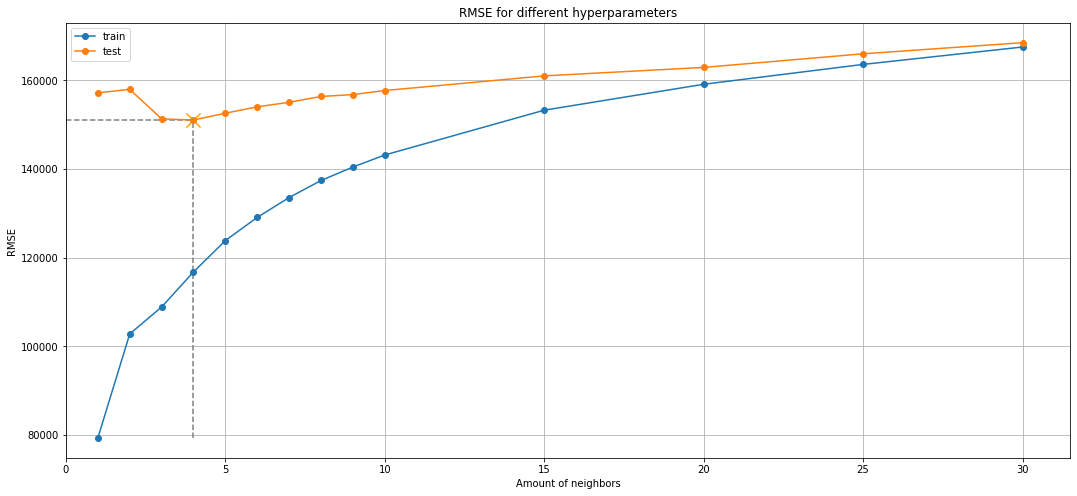

In [48]:
# Set empty lists for the desired accuracy values
rmse_accuracy_train_KNN = []
rmse_accuracy_test_KNN = []

# Set list of tree depth values
k_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# Loop over the different depth values
for k in k_neighbors:
        
    # Set model with the number of neighbors for this iteration
    KNN = KNeighborsRegressor(n_neighbors=k)
    
    # Train model
    KNN.fit(X_train,y_train)
    
    # Predict over train set
    y_train_pred = KNN.predict(X_train)
    rmse_accTrain_KNN = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predict over test set
    y_test_pred = KNN.predict(X_test)
    rmse_accTest_KNN = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append accuracy to the list of accuracy values
    rmse_accuracy_train_KNN.append(rmse_accTrain_KNN)
    rmse_accuracy_test_KNN.append(rmse_accTest_KNN)
    
    rmse_KNN_min = min(rmse_accuracy_test_KNN)
    KNN_min = rmse_accuracy_test_KNN.index(min(rmse_accuracy_test_KNN))+1
    
plt.figure(figsize=(18,8))
plt.plot(k_neighbors,rmse_accuracy_train_KNN,'o-',label='train' )
plt.plot(k_neighbors,rmse_accuracy_test_KNN,'o-',label='test')

plt.hlines(rmse_KNN_min, 
           xmin = 0, 
           xmax = KNN_min, 
           linestyles = 'dashed',
           colors = 'grey')

plt.vlines(KNN_min, 
           ymax = rmse_KNN_min, 
           ymin = min(rmse_accuracy_train_KNN), 
           linestyles = 'dashed',
           colors = 'grey')

plt.scatter(KNN_min,rmse_KNN_min, s = 200, color = 'orange', marker = "x")

plt.xlim(0,)
plt.ylabel('RMSE')
plt.xlabel('Amount of neighbors')
plt.legend()
plt.title('RMSE for different hyperparameters')
plt.grid()

print('Min RMSE in test of '+"${:,.0f}". format(rmse_KNN_min),
      ', corresponding to amount of neighbors k = ',
     f"{KNN_min}")

It is clear from the analysis carried out in this section that the model that best adapts to the problem posed is that of **decision tree**, with a **k = 4**

# Conclusions

Although the analysis carried out so far makes it possible to select the best regression model by comparing relative errors, the feasibility of performing price predictions should be taken into account, which is the objective of this document. It should be noted that US $ 138,384, which is the value of the RMSE, is also the value of some apartments, so an error of this magnitude is inadmissible.

This model presents some opportunities for improvement, such as:
- Better handling of missing values, such as imputation, could be done instead of removing these instances from the dataset
- Categorical variables such as the neighborhood or perhaps the presence of some keywords within the description could be introduced to the analysis
- Data external to the dataset could be used such as the location of some points of interest (such as subway stations, hospitals, schools or bus stops) relative to the properties using the coordinates
- As a future improvement of the dataset and taking into account that the pricing of a property (and more so in a real estate market such as Argentina) can present large variations in a short period of time, a binary variable "`sale_status`" (with values like `sold` / `not sold`) could be added. This categorical variable would be easy to collect, and at the same time penalize excessively high prices, resulting in an improvement in the predictive capacity of the model.